# Data Preparation

## Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

df = pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Data Understanding

In [4]:
print("data shape : ", df.shape)

data shape :  (400, 3)


In [11]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']

print("X  : ", X.shape)
print("y  : ", y.shape)

X  :  (400, 2)
y  :  (400,)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.Purchased.value_counts()

,count
Purchased,
0,257
1,143


## Data Cleaning

In [8]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


## Data Visualization

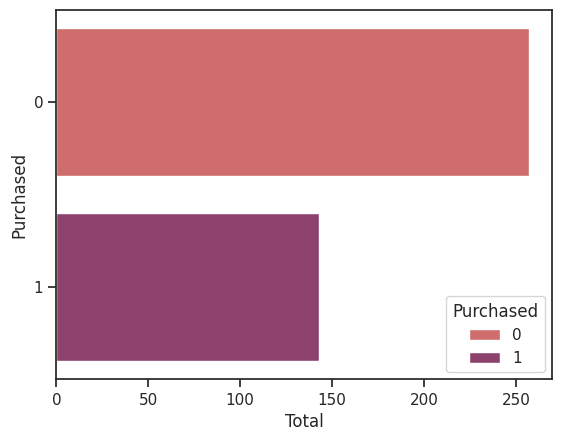

In [37]:
sns.set_theme(style='ticks')
sns.countplot(y='Purchased', data=df, hue='Purchased', palette='flare')
plt.ylabel ('Purchased')
plt.xlabel ('Total')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

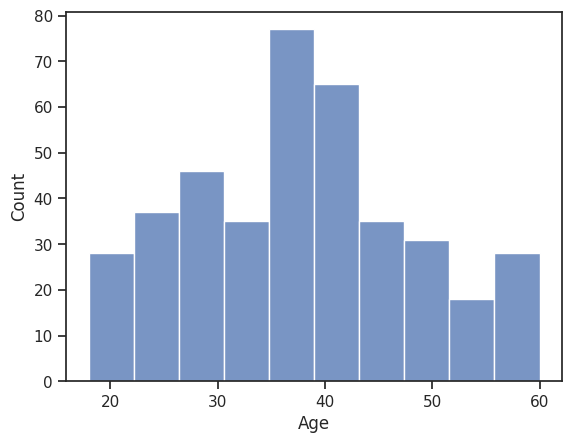

In [10]:
sns.histplot(df['Age'])

## Splitting into Train Set and Test Set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
print(f"x_train :",x_train.shape)
print(f"x_test  :",x_test.shape)
print(f"y_train :",y_train.shape)
print(f"y_test  :",y_test.shape)

x_train : (320, 2)
x_test  : (80, 2)
y_train : (320,)
y_test  : (80,)


# Modeling

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
KNN_acc = accuracy_score (y_pred, y_test)

# Evaluate Model

In [40]:
print(classification_report(y_test, y_pred))
print('KNN accuracy : {:.2f}%'.format(KNN_acc * 100))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80

KNN accuracy : 82.50%


# Prediction

In [15]:
testing = {'Age' : [35],
           'EstimatedSalary' : [22000]}
testing = pd.DataFrame(testing)
testing

,Age,EstimatedSalary
0,35,22000


In [39]:
pred_try = knn.predict(testing)
print("Prediction from new input:" )
print(pred_try)

Prediction from new input:
[0]
